# **Behavioral Cloning**

**Train a car to drive autonomously in a simulator**


## The goals

The goals / steps of this project are the following:
* Use the simulator to collect data of good driving behavior
* Build a convolution neural network in Keras that predicts steering angles from images
* Train and validate the model with a training and validation set
* Test that the model successfully drives around track one without leaving the road
* Summarize the results with a written report

## Collecting the Training Set

To capture good driving behavior, I first recorded a couple of laps on track one using center lane driving. Each recording epoch consist of 3 images represent 3 cameras on the vehicle. Having 3 images for each epoch help collecting more data, and teach the network how to steer back to the center and correct wrong behaviors.

Here is an example of how center lane driving looks from all the three cameras:

Left camera              |  Center camera | Right camera
:---------------------:|:---------------------:|:---------------------:
![]( https://github.com/shmulik-willinger/behavioral_cloning/blob/master/readme_img/left_2017_08_13_15_56_31_426.jpg?raw=true)  |  ![]( https://github.com/shmulik-willinger/behavioral_cloning/blob/master/readme_img/center_2017_08_13_15_56_31_426.jpg?raw=true) |  ![]( https://github.com/shmulik-willinger/behavioral_cloning/blob/master/readme_img/right_2017_08_13_15_56_31_426.jpg?raw=true)

In order to use the left and right images I needed to add a correction factor for the center-steering measurment, in order to  create adjusted steering measurements for the side camera images

Some of the interesting challenges on the tracks includes driving in the sharp curves, different texture and different borders of the road, and the second Track is also different from the first one. In order to train the car to drive on all of them I repeated the collection process on all the tracks and laps. Driving in the simulator is pretty difficult in some curves.

I collected data of center lane driving from 5 laps, and some extra data for 'recovery driving from the sides', along with special data recording driving smoothly around 10 sharp curves.

After the collection process, I had 74760 data points images to start with.

Each image dimensions is 160 X 320 pixels with 3 channels -RGB.


In [38]:
#Loading the data
import os 
import csv

lines=[]
data_folder = 'C:\data\\'
file = '\driving_log.csv'
for child in os.listdir(data_folder):
    data_subfolder = os.path.join(data_folder, child)
    sub_file = data_subfolder + file
    with open(sub_file) as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            lines.append(line)
    print ("file: ", sub_file, ", data samples: ", len(lines))
            
print("total data samples: ", len(lines))


file:  C:\data\1\driving_log.csv , data samples:  8036
file:  C:\data\2\driving_log.csv , data samples:  8666
file:  C:\data\3\driving_log.csv , data samples:  9351
file:  C:\data\4\driving_log.csv , data samples:  11100
file:  C:\data\5\driving_log.csv , data samples:  12044
file:  C:\data\6\driving_log.csv , data samples:  12460
total data samples:  12460


In [22]:
#Example of how the csv file holds the data

import pandas as pn
%matplotlib inline

column_names = ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
data_sample = pn.read_csv(data_folder + os.listdir(data_folder)[1] + file ,names=column_names)
data_sample.iloc[:10]

,center,left,right,steering,throttle,brake,speed
0,C:\data\2\IMG\center_2017_08_14_09_31_18_129.jpg,C:\data\2\IMG\left_2017_08_14_09_31_18_129.jpg,C:\data\2\IMG\right_2017_08_14_09_31_18_129.jpg,0.0,0.000000,0,1.682009
1,C:\data\2\IMG\center_2017_08_14_09_31_18_205.jpg,C:\data\2\IMG\left_2017_08_14_09_31_18_205.jpg,C:\data\2\IMG\right_2017_08_14_09_31_18_205.jpg,0.0,0.000000,0,1.668493
2,C:\data\2\IMG\center_2017_08_14_09_31_18_272.jpg,C:\data\2\IMG\left_2017_08_14_09_31_18_272.jpg,C:\data\2\IMG\right_2017_08_14_09_31_18_272.jpg,0.0,0.000000,0,1.658427
3,C:\data\2\IMG\center_2017_08_14_09_31_18_341.jpg,C:\data\2\IMG\left_2017_08_14_09_31_18_341.jpg,C:\data\2\IMG\right_2017_08_14_09_31_18_341.jpg,0.0,0.000000,0,1.645101
4,C:\data\2\IMG\center_2017_08_14_09_31_18_408.jpg,C:\data\2\IMG\left_2017_08_14_09_31_18_408.jpg,C:\data\2\IMG\right_2017_08_14_09_31_18_408.jpg,0.0,0.000000,0,1.635177
5,C:\data\2\IMG\center_2017_08_14_09_31_18_484.jpg,C:\data\2\IMG\left_2017_08_14_09_31_18_484.jpg,C:\data\2\IMG\right_2017_08_14_09_31_18_484.jpg,0.0,0.000000,0,1.622037
6,C:\data\2\IMG\center_2017_08_14_09_31_18_557.jpg,C:\data\2\IMG\left_2017_08_14_09_31_18_557.jpg,C:\data\2\IMG\right_2017_08_14_09_31_18_557.jpg,0.0,0.000000,0,1.609004
7,C:\data\2\IMG\center_2017_08_14_09_31_18_630.jpg,C:\data\2\IMG\left_2017_08_14_09_31_18_630.jpg,C:\data\2\IMG\right_2017_08_14_09_31_18_630.jpg,0.0,0.000000,0,1.599297
8,C:\data\2\IMG\center_2017_08_14_09_31_18_697.jpg,C:\data\2\IMG\left_2017_08_14_09_31_18_697.jpg,C:\data\2\IMG\right_2017_08_14_09_31_18_697.jpg,0.0,0.145292,0,1.661237
9,C:\data\2\IMG\center_2017_08_14_09_31_18_764.jpg,C:\data\2\IMG\left_2017_08_14_09_31_18_764.jpg,C:\data\2\IMG\right_2017_08_14_09_31_18_764.jpg,0.0,0.317140,0,1.792232


In [25]:
#Augmentation functions

def flip_images(images, measurements):
    flipped_images, flipped_measurements = [], []
    for img, measurements in zip(images, measurements):
        flipped_images.append(cv2.flip(img, 1))
        flipped_measurements.append(measurements * -1.0)
    return flipped_images, flipped_measurements
        
       
def brightness_randomization(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hsv[::2] = hsv[::2] * (.5 + np.random.random())
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)


def crop_images(images):
    cropped_images= []
    for img in images:
        cropped_images.append(img[60:140, 0:320])
    return cropped_images

def grayscale(images):
    gray_images= []
    for img in images:
        gray_images.append(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
    return gray_images


## Image processing visualization example

In [4]:

import matplotlib.pyplot as plt
import numpy as np
import cv2

sample_images=[]
sample_images_title=[]
  
#original image
file = 'C:\\data\\1\\IMG\\left_2016_12_01_13_34_24_656.jpg'
original_img = cv2.imread(file)
sample_images.append(original_img)
sample_images_title.append('original image')
print("original image shape: ", original_img.shape)

#flipping the image
flip_image = cv2.flip(original_img,1)
sample_images.append(flip_image)
sample_images_title.append('flipped image')
print("flipped image shape: ", flip_image.shape)

#brightness randomization
image_hsv = brightness_randomization(original_img)
sample_images.append(image_hsv)
sample_images_title.append('brightness randomization')
print("brightness image shape: ", image_hsv.shape)

#reduced bandwidth 
yuv_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2YUV)
sample_images.append(yuv_img)
sample_images_title.append('reduced bandwidth')
print("yuv image shape: ", yuv_img.shape)

#cropping the image
crop_img = original_img[60:140, 0:320]
sample_images.append(crop_img)
sample_images_title.append('cropped image')
print("cropped image shape: ", crop_img.shape)

#grayscale 
gray_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)
sample_images.append(gray_img)
sample_images_title.append('grayscale image')
print("grayscale image shape: ", gray_img.shape)


original image shape:  (160, 320, 3)
flipped image shape:  (160, 320, 3)
brightness image shape:  (160, 320, 3)
yuv image shape:  (160, 320, 3)
cropped image shape:  (80, 320, 3)
grayscale image shape:  (160, 320)


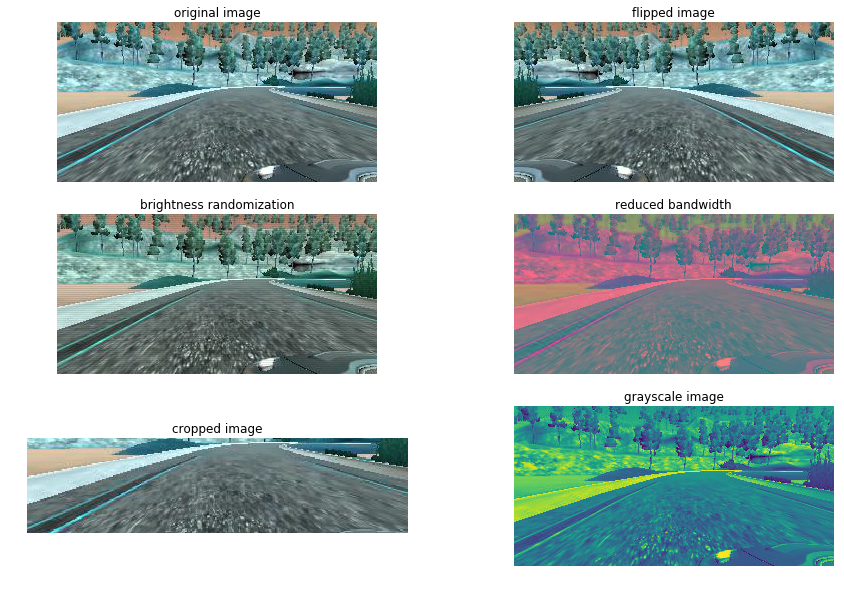

In [62]:

plt.figure(figsize=(15, 10))
for i in range(len(sample_images)):
   # Displaying the images 
    plt.subplot(3, 2, i+1)
    plt.imshow(sample_images[i]) 
    plt.title(sample_images_title[i])
    plt.axis('off')

In [1]:
# Verifying the versions. I ran the model on Amazon GPU instance 
# and in order for the saved model to run locally the versions must be the same
import keras
print (keras.__version__)

import tensorflow
print (tensorflow.__version__)

from keras import backend
print (backend._BACKEND)

Using TensorFlow backend.


2.0.6
1.2.1
tensorflow


Regarding the distribution of the steering lables, It is clear to see that steering angle s=0 have the highest frequency, and that there are more positive angles than negative, meaning the dataset is not balance (By horizontally reversing the images we gain distribution balancing)

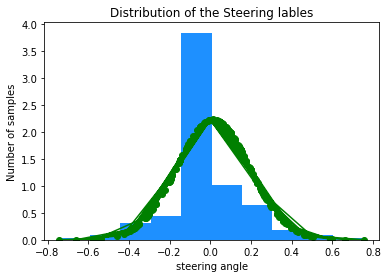

In [20]:
#The distribution of the steering angle for the dataset
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab as pl

fit = stats.norm.pdf(y_train, np.mean(y_train), np.std(y_train)) 
plt.plot(y_train,fit,'-o', color='g')
plt.hist(y_train,normed=True,color='dodgerblue')     
plt.title("Distribution of the Steering lables")
plt.ylabel("Number of samples")
plt.xlabel("steering angle")
plt.show()  

In order to gauge how well the model was working, I split my images and steering angle data into a training and validation set. The validation set took 20% of the dataset and helped determine if the model was over or under fitting.

In [5]:
# Spliting the dataset to Train and Validation
from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(lines, test_size=0.2)


## Pre-process the Data Set

Data augmentation has a couple of benefits, including adding more comprehensive data for training.
I needed lots of data in order to well train the model. After collecting all the data from the two tracks, driving back and forth, and using all the 3 cameras images, I also performed the following steps:

The top portion of the image capture sky, trees and other elements which are unnecessary for the training process and might distract the model, the same for the lower portion of the image. So I decided to remove pixels containing redundant information. I cropped The images to remove this pixels. Each image reduced capacity by 50%, and I gained a more accurate model, along with savings space, memory and model runtime.

Here is an example of the cropping process on an image:

original image      |  Cropping process | Cropped image
:---------------------:|:---------------------:|:---------------------:
![]( https://github.com/shmulik-willinger/behavioral_cloning/blob/master/readme_img/original.jpg?raw=true)  |  ![]( https://github.com/shmulik-willinger/behavioral_cloning/blob/master/readme_img/cropped.jpg?raw=true) |  ![]( https://github.com/shmulik-willinger/behavioral_cloning/blob/master/readme_img/processed.jpg?raw=true)

Since each recording epoch has 3 images represent 3 cameras on the vehicle, I used all this images to increase the dataset and generalize the model. It's important to add a correction-angle  for the steering measurement for the left and right cameras, since the steering provided from the simulator represent the center camera only.

 ![]( https://github.com/shmulik-willinger/behavioral_cloning/blob/master/readme_img/correction-angle.png?raw=true)

To help the model generalize better and to improve the accuracy on the opposite curves, I flipped the images and angles to simulate driving counter-clockwise, thinking that this would save me from collecting more reliable information and will double the dataset. There are couple of ways to horizontally flip an image, I used cv2.flip() after observing that it is much faster than using other methods like np.fliplr().

Here is an example of image that has been flipped in that process:

original image      |  flipped image
:---------------------:|:---------------------:
![]( https://github.com/shmulik-willinger/behavioral_cloning/blob/master/readme_img/before_flip.jpg?raw=true)  |  ![]( https://github.com/shmulik-willinger/behavioral_cloning/blob/master/readme_img/after_flip.jpg?raw=true)

In [26]:
angle_deviation=0.05

def load_images(line):
    images = []
    measurements = []
    # Load the center image and steering
    steering = float(line[3])
    images.append(cv2.imread(line[0]))
    measurements.append(steering)

    # For 25% of the cases - load also the right and left images
    if (random.randint(1, 4) == 4):
        images.append(cv2.imread(line[1]))
        measurements.append(steering + angle_deviation)
        images.append(cv2.imread(line[2]))
        measurements.append(steering - angle_deviation)

    # Adding flipped images for 30% of the cases
    if (random.randint(1, 3) == 3):
        flipped_images, flipped_measurements = flip_images(images, measurements)
        images.extend(flipped_images)
        measurements.extend(flipped_measurements)
    return images, measurements


**Using Generator**

The images captured in the car simulator are very large comparing to dataset images for other common networks. Each image contains 76,800 pixels (80X320X3) after cropping, and when the dataset contains 70K images we need a huge memory for network training. I used Generator, enables to train the model by producing batches with data processing in real time, only when the model need it.

In [27]:
import cv2
import numpy as np
import random
from sklearn.utils import shuffle

def generator(samples, batch_size=32):
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, len(samples), batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images, measurements = [], []
            for batch_sample in batch_samples:
                loaded_images, loaded_imeasurements = [],[]
                #Loading the original images from the 3 cameras, cropping, flipping and append to the dataset
                loaded_images, loaded_imeasurements = load_images(line)
                cropped_images = crop_images(loaded_images)
                #gray_images = grayscale(cropped_images)
                images.extend(cropped_images)
                measurements.extend(loaded_imeasurements)              
                  
            X_train = np.array(images)
            y_train = np.array(measurements)
            yield shuffle(X_train, y_train)

# compile and train the model using the generator function
train_generator = generator(train_samples, batch_size=32)
validation_generator = generator(validation_samples, batch_size=32)

print("features Shape: ", train_generator)
print("lables Shape: ", validation_generator)

features Shape:  <generator object generator at 0x000000001855F200>
lables Shape:  <generator object generator at 0x0000000009FAC3B8>


## Model Architecture

My model consisted of the following layers:


| Layer | Component    	|     Output	 	| # Param |
|:----------------:|:------------:|:------------:|:------------:|
| Lambda | Normalization and mean zero | (None, 80, 320, 3) | 0 |
| Convolution | kernel_size=(5, 5), strides=(2, 2), padding='valid', activation='relu' | (None, 38, 158, 24) | 1824 |
| Dropout	| rate=0.5 | (None, 38, 158, 24) | 0 |
| Convolution |	kernel_size=(5, 5), strides=(2, 2), padding='valid', activation='relu'	|(None, 17, 77, 36) | 21636 |
| Dropout	| rate=0.5 | (None, 17, 77, 36) | 0 |
| Convolution |kernel_size=(5, 5), strides=(2, 2), padding='valid', activation='relu'	| (None, 7, 37, 48) | 43248 |
| Dropout	| rate=0.5 | (None, 7, 37, 48) | 0 |
| Convolution	| kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu' | (None, 5, 35, 64) | 27712|
| Dropout	| rate=0.5 | (None, 5, 35, 64) | 0 |
| Convolution	| kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu' | (None, 3, 33, 64) | 36928 |
| Dropout	| rate=0.5 | (None, 3, 33, 64) | 0 |
| Flatten | Flattens the input to one dimension |(None, 6336)| 0 |
| Dense | Fully connected |(None, 100)| 633700|
| Dense | Fully connected |(None, 50)| 5050|
| Dense | Fully connected |(None, 10)| 510|
| Dense | Output layer  |(None, 1)| 1|

The network consists of a convolution neural network starting with normalization layer, followed by 3 convolution layers with kernel of 5x5 and 2 convolution layer with kernel of 3X3. filter sizes and depths between 24 and 64, with by Dropout layers between them.

The model uses RELU activation on the layers to introduce nonlinearity, and the data is normalized in the model using a Keras lambda layer.

At the end of the model I have 4 Fully connected layers and a single output node that will predict the steering angle (regression network)


In [28]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D

dropout = 0.5

model = Sequential()
#normalization and mean zero - centered around zero with small standard deviation 
model.add(Lambda(lambda x: x/127.5 -1.0, input_shape=(80,320,3))) 
model.add(Conv2D(24, kernel_size=(5, 5), strides=(2, 2), padding='valid', activation='relu'))
model.add(Dropout(dropout))
model.add(Conv2D(36, kernel_size=(5, 5), strides=(2, 2), padding='valid', activation='relu'))
model.add(Dropout(dropout))
model.add(Conv2D(48, kernel_size=(5, 5), strides=(2, 2), padding='valid', activation='relu'))
model.add(Dropout(dropout))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
model.add(Dropout(dropout))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

In [34]:
from time import time
start_time = time()

model.compile(loss='mse', optimizer='adam')
history_object = model.fit_generator(train_generator, steps_per_epoch= len(train_samples), 
    validation_data=validation_generator, validation_steps=len(validation_samples), epochs=5, verbose = 1)

# save the model to use it in the simulator
model.save('model.h5')

total_time = time() - start_time
minutes, seconds = divmod(total_time, 60)
print ("Total time for training: ", minutes, "min, {:.0f}".format(seconds),  "s ")

Epoch 1/5
11/10 [===============================] - 56s - loss: 0.0011 - val_loss: 8.3150e-04
Epoch 2/5
11/10 [===============================] - 54s - loss: 7.1705e-04 - val_loss: 7.7945e-04
Epoch 3/5
11/10 [===============================] - 54s - loss: 7.0058e-04 - val_loss: 6.0891e-04
Epoch 4/5
11/10 [===============================] - 65s - loss: 3.7522e-04 - val_loss: 4.9931e-04
Epoch 5/5
11/10 [===============================] - 62s - loss: 2.5159e-04 - val_loss: 5.5145e-04
Total time for training:  4.0 min, 54 s 


dict_keys(['val_loss', 'loss'])


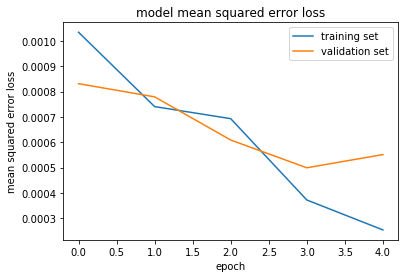

In [35]:
from keras.models import Model
import matplotlib.pyplot as plt

### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

In [ ]:
# Test samples prediction
streering_prediction = model.evaluate_generator(test_samples, 128)
print('Test Loss: ', streering_prediction)


In [36]:
from keras.models import load_model
model = load_model('model.h5')

# save the architecture of the model as json
json_string = model.to_json()
print(json_string)
with open('model.json', 'w') as file:
    file.write(json_string)

{"class_name": "Sequential", "config": [{"class_name": "Lambda", "config": {"name": "lambda_2", "trainable": true, "batch_input_shape": [null, 80, 320, 3], "dtype": "float32", "function": ["\u00e3\u0001\u0000\u0000\u0000\u0000\u0000\u0000\u0000\u0001\u0000\u0000\u0000\u0002\u0000\u0000\u0000C\u0000\u0000\u0000s\f\u0000\u0000\u0000|\u0000d\u0001\u001b\u0000d\u0002\u0018\u0000S\u0000)\u0003Ng\u0000\u0000\u0000\u0000\u0000\u00e0_@g\u0000\u0000\u0000\u0000\u0000\u0000\u00f0?\u00a9\u0000)\u0001\u00da\u0001xr\u0001\u0000\u0000\u0000r\u0001\u0000\u0000\u0000\u00fa\u001f<ipython-input-28-6f6120a7c053>\u00da\b<lambda>\t\u0000\u0000\u0000\u00f3\u0000\u0000\u0000\u0000", null, null], "function_type": "lambda", "output_shape": null, "output_shape_type": "raw", "arguments": {}}}, {"class_name": "Conv2D", "config": {"name": "conv2d_5", "trainable": true, "filters": 24, "kernel_size": [5, 5], "strides": [2, 2], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation":

In [37]:
summary = model.summary()
print(summary)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 80, 320, 3)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 38, 158, 24)       1824      
_________________________________________________________________
dropout_3 (Dropout)          (None, 38, 158, 24)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 77, 36)        21636     
_________________________________________________________________
dropout_4 (Dropout)          (None, 17, 77, 36)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 37, 48)         43248     
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 37, 48)         0         
__________